In [4]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=ca2fd83c7b56132c1669f488d4318ad1c726825f1421d10459cc5cc3b19a9e43
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [6]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,floor, avg, count, stddev, min, max, expr

# Start a Spark session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the dataset
file_path = "BostonHousing.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [8]:
# Show the first few rows of the dataset
df.show(5)

# Check for missing values
df = df.dropna()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [9]:
#Summary Statistics
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [10]:
# Create bins based on the average number of rooms
df = df.withColumn("RM_bin", floor(df["RM"]))

In [11]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|RM_bin|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|     6|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|     6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|     7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|     6|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|     7|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------+
only showing top 5 rows



In [12]:
# Group by the bins and calculate statistics
stats = df.groupBy("RM_bin").agg(
    count("*").alias("count"),
    avg("MEDV").alias("avg_MEDV"),
    stddev("MEDV").alias("stddev_MEDV"),
    min("MEDV").alias("min_MEDV"),
    max("MEDV").alias("max_MEDV"),
    expr("percentile_approx(MEDV, 0.5)").alias("median_MEDV"),
    avg("AGE").alias("avg_AGE"),
    stddev("AGE").alias("stddev_AGE"),
    min("AGE").alias("min_AGE"),
    max("AGE").alias("max_AGE"),
    expr("percentile_approx(AGE, 0.5)").alias("median_AGE"),
    avg("TAX").alias("avg_TAX"),
    stddev("TAX").alias("stddev_TAX"),
    min("TAX").alias("min_TAX"),
    max("TAX").alias("max_TAX"),
    expr("percentile_approx(TAX, 0.5)").alias("median_TAX")
)

In [13]:
stats.show()

+------+-----+------------------+------------------+--------+--------+-----------+------------------+------------------+-------+-------+----------+------------------+------------------+-------+-------+----------+
|RM_bin|count|          avg_MEDV|       stddev_MEDV|min_MEDV|max_MEDV|median_MEDV|           avg_AGE|        stddev_AGE|min_AGE|max_AGE|median_AGE|           avg_TAX|        stddev_TAX|min_TAX|max_TAX|median_TAX|
+------+-----+------------------+------------------+--------+--------+-----------+------------------+------------------+-------+-------+----------+------------------+------------------+-------+-------+----------+
|     7|   51|36.917647058823526| 8.316362326939656|    15.0|    50.0|       35.2|57.862745098039234|28.174392350390196|   10.0|  100.0|      54.2|308.96078431372547|120.94477430369842|    193|    666|       264|
|     6|  269| 22.01598513011151| 6.467721594707344|     7.2|    50.0|       22.2| 65.53866171003715|28.934373629072645|    2.9|  100.0|      74.4|4

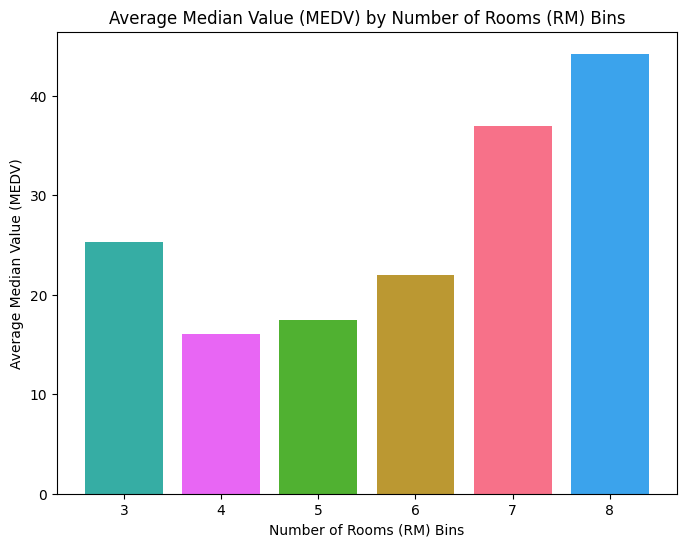

In [30]:
# Convert to Pandas DataFrame for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stats_pd = stats.toPandas()

# Plot the statistics
plt.figure(figsize=(8, 6))
colors = sns.color_palette("husl", len(stats_pd))
plt.bar(stats_pd["RM_bin"], stats_pd["avg_MEDV"], color=colors)
plt.xlabel("Number of Rooms (RM) Bins")
plt.ylabel("Average Median Value (MEDV)")
plt.title("Average Median Value (MEDV) by Number of Rooms (RM) Bins")
plt.show()

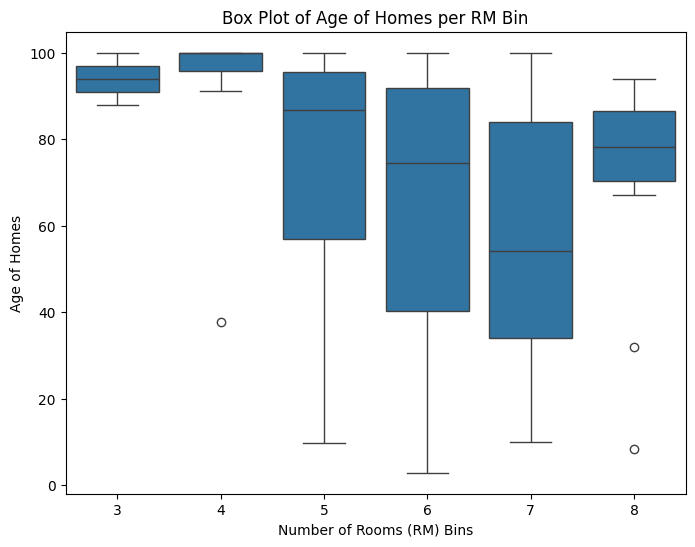

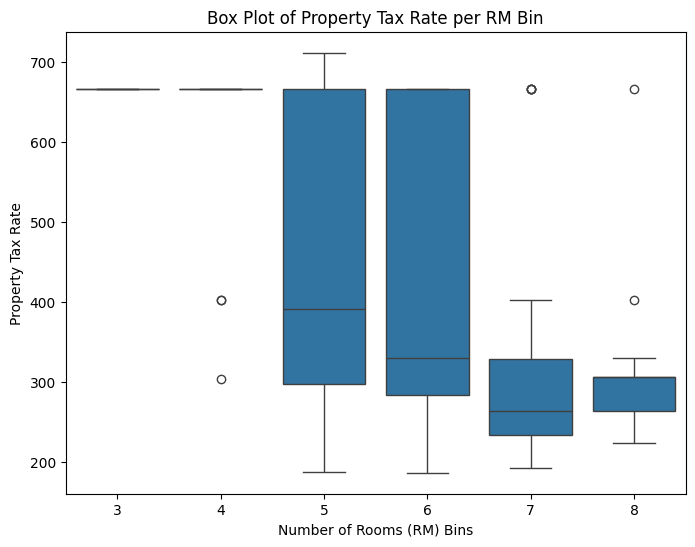

In [17]:
# Box plots of AGE values per RM bin
plt.figure(figsize=(8, 6))
data_for_boxplot_age = df.select("RM_bin", "AGE").toPandas()
sns.boxplot(x="RM_bin", y="AGE", data=data_for_boxplot_age)
plt.xlabel("Number of Rooms (RM) Bins")
plt.ylabel("Age of Homes")
plt.title("Box Plot of Age of Homes per RM Bin")
plt.show()

# Box plots of TAX values per RM bin
plt.figure(figsize=(8, 6))
data_for_boxplot_tax = df.select("RM_bin", "TAX").toPandas()
sns.boxplot(x="RM_bin", y="TAX", data=data_for_boxplot_tax)
plt.xlabel("Number of Rooms (RM) Bins")
plt.ylabel("Property Tax Rate")
plt.title("Box Plot of Property Tax Rate per RM Bin")
plt.show()

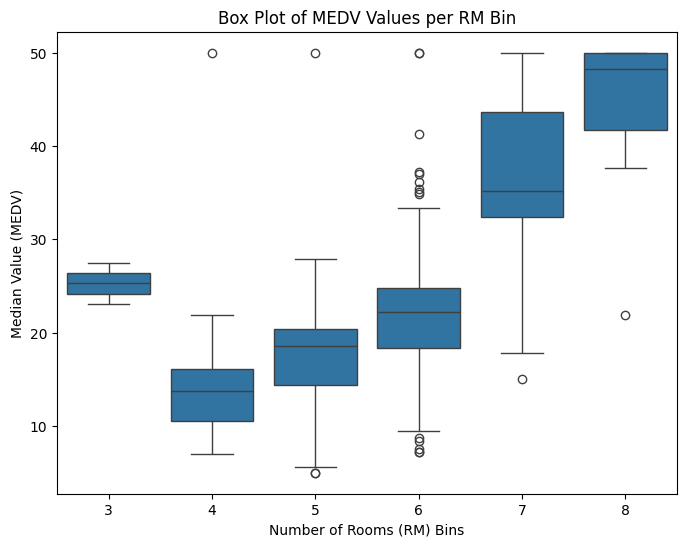

In [19]:
# Box plot of MEDV values per RM bin
plt.figure(figsize=(8, 6))
data_for_boxplot = df.select("RM_bin", "MEDV").toPandas()
sns.boxplot(x="RM_bin", y="MEDV", data=data_for_boxplot)
plt.xlabel("Number of Rooms (RM) Bins")
plt.ylabel("Median Value (MEDV)")
plt.title("Box Plot of MEDV Values per RM Bin")
plt.show()

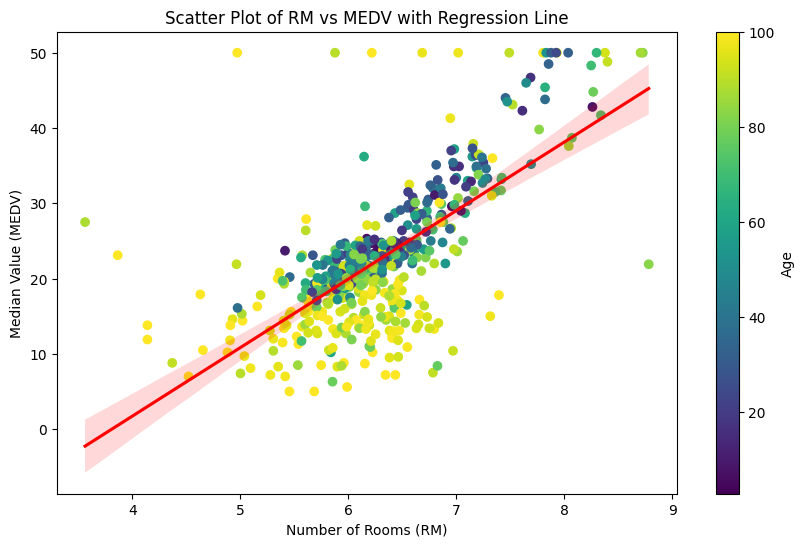

In [28]:
plt.figure(figsize=(10, 6))
data_for_scatter = df.select("RM", "MEDV", "AGE").toPandas()
scatter = plt.scatter(data_for_scatter["RM"], data_for_scatter["MEDV"], c=data_for_scatter["AGE"], cmap="viridis")
plt.colorbar(scatter, label='Age')
sns.regplot(x="RM", y="MEDV", data=data_for_scatter, scatter=False, color='red')
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.title("Scatter Plot of RM vs MEDV with Regression Line")
plt.show()
